In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
card=pd.read_csv('card.csv')
sales=pd.read_csv('sales.csv')
visits=pd.read_csv('visits.csv')

In [24]:
visits=visits.rename(columns={'idstore':'idStore'})
card.replace(['Female birthday','Female relations','Male birthday','Male relations','Unisex birthday','Unisex relations'],
              ['Female Birthday','Female Relations','Male Birthday','Male Relations','Unisex Birthday','Unisex Relations'], inplace=True)
card.drop_duplicates(subset='idCard',inplace=True)

# Data Analysis/Insights

In [25]:
print('Cards \n',card.head())
print('Sales \n',sales.head())
print('Visits \n',visits.head())

Cards 
    idCard           mission
0  1850.0   Unisex Birthday
1   810.0             Blank
2  3704.0    Male Relations
3  1671.0          Sympathy
4  4437.0  Unisex Relations
Sales 
    idStore  idCard  quantity  revenue
0    680.0  1850.0      42.0   171.39
1    377.0   810.0      37.0    73.18
2    412.0  3704.0      38.0   188.54
3    661.0  1671.0     104.0   416.81
4    676.0  4437.0      53.0   159.16
Visits 
    idStore  visitors
0      680     31871
1      377      4204
2      412     27391
3      661     16019
4      676    146949


In [26]:
print('Number of unique mission \n',len(card.groupby(by='mission').count()['idCard']))
card.groupby(by='mission', as_index=False).count()

Number of unique mission 
 10


,mission,idCard
0,Blank,499
1,Female Birthday,498
2,Female Relations,497
3,Love,498
4,Male Birthday,497
5,Male Relations,499
6,Sympathy,499
7,Thanks,499
8,Unisex Birthday,498
9,Unisex Relations,498


In [27]:
print('Number of unique CardIDs \n',len(card.groupby(by='idCard').count()['mission']))

Number of unique CardIDs 
 4982


In [28]:
print('Number of unique StoreIDs \n',len(visits.groupby(by='idStore').count()['visitors']))

Number of unique StoreIDs 
 725


# Merging all files in one DataFrame (df) and creating new column AOV (average order value) from revenue and quantity

In [29]:
df=pd.merge(sales,card, on='idCard')
df=pd.merge(df,visits,on='idStore')
df['AOV']=df['revenue']/df['quantity']
df.dropna(inplace=True)
print(df.head())

   idStore  idCard  quantity  revenue          mission  visitors       AOV
0    680.0  1850.0      42.0   171.39  Unisex Birthday     31871  4.080714
1    680.0  2930.0     221.0   888.05    Male Birthday     31871  4.018326
2    680.0  3597.0     159.0   155.89    Male Birthday     31871  0.980440
3    680.0  1304.0     191.0   962.03  Female Birthday     31871  5.036806
4    680.0  4137.0       6.0    24.24           Thanks     31871  4.040000


# Share of each mission in total revenue

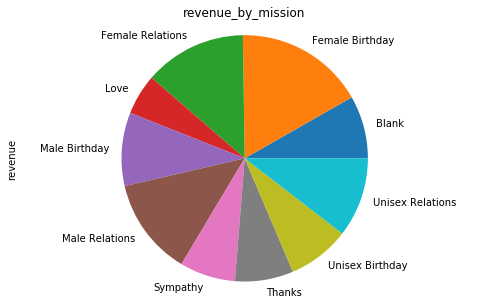

In [30]:
plt.figure(figsize=(8,5))
df['revenue'].groupby(df['mission']).sum().plot(kind='pie')
plt.title('revenue_by_mission')
plt.axis('equal')
plt.show()

# Store-wise total revenue, quantity of all cards sold in that store and number of visitors in that store

In [31]:
store_rev=df[['idStore','revenue','quantity']].groupby(by='idStore', as_index=False).sum()
ddf=df[['idStore','visitors']].drop_duplicates(subset='idStore')
store_rev=pd.merge(store_rev,ddf,on='idStore',how='inner')
store_rev.sort_values(by='revenue', ascending=False).head()

,idStore,revenue,quantity,visitors
504,508.0,177502.79,66568.0,89175
537,541.0,176023.75,57216.0,59530
623,627.0,174069.19,57607.0,56000
149,152.0,173813.75,68144.0,36274
638,642.0,172588.48,57580.0,45094


           idStore   revenue  quantity  visitors
idStore   1.000000 -0.007525  0.016867 -0.013711
revenue  -0.007525  1.000000  0.938580  0.708742
quantity  0.016867  0.938580  1.000000  0.675281
visitors -0.013711  0.708742  0.675281  1.000000


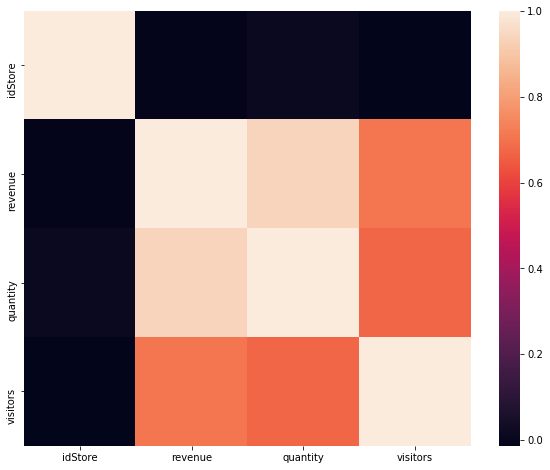

In [32]:
#correlation b/w attributes
print(store_rev.corr())
plt.figure(figsize=(10,8))
sns.heatmap(store_rev.corr())

In [33]:
store_rev.head()

,idStore,revenue,quantity,visitors
0,1.0,102336.91,34252.0,48095
1,2.0,44039.19,14766.0,2323
2,3.0,27144.39,8506.0,1534
3,4.0,158303.51,53833.0,29113
4,5.0,107209.43,35573.0,11064


# Creating new column "%of total", it will represent the percentage of revenue of that store against total revenue generated across all stores


In [34]:
store_rev['%of total']=store_rev['revenue'].apply(lambda x:  x*100/(store_rev['revenue'].sum()))
store_rev.head()

,idStore,revenue,quantity,visitors,%of total
0,1.0,102336.91,34252.0,48095,0.174245
1,2.0,44039.19,14766.0,2323,0.074984
2,3.0,27144.39,8506.0,1534,0.046218
3,4.0,158303.51,53833.0,29113,0.269537
4,5.0,107209.43,35573.0,11064,0.182541


# Selecting top 300 stores contributing 62.85% of total revenue (This can be changed by altering the number of stores in "head(300)"

In [ ]:
top_store=store_rev.sort_values(by='revenue', ascending=False).head(300)
top_store['%of total'].sum()

# Card-wise total revenue and quantity sold across all stores against that idCard

In [36]:
card_rev=df[['idCard','revenue','quantity']].groupby(by='idCard', as_index=False).sum()
card_rev.sort_values(by='revenue', ascending=False).head()

,idCard,revenue,quantity
411,413.0,48612.41,9597.0
2870,2878.0,47289.00,9297.0
4262,4278.0,46538.36,9333.0
2360,2368.0,44896.25,9069.0
4867,4885.0,42630.18,8528.0


# Creating new column "%of total", it will represent the percentage of revenue generated by each idcard against total revenue generated by all cards across all stores

In [37]:
card_rev['%of total']=card_rev['revenue'].apply(lambda x:  x*100/(card_rev['revenue'].sum()))

In [38]:
card_rev.head()

,idCard,revenue,quantity,%of total
0,1.0,28088.35,5508.0,0.047825
1,2.0,5598.93,15527.0,0.009533
2,3.0,12059.13,3038.0,0.020533
3,4.0,25232.08,5034.0,0.042962
4,5.0,10553.37,2673.0,0.017969


# Selecting top 1500 cards contributing to 53.37% of total revenue (This can be changed by altering the number of cards in "head(1500)"

In [44]:
top_card=card_rev.sort_values(by='revenue', ascending=False).head(1500)

In [45]:
top_card['%of total'].sum()

53.37047862637462

In [46]:
print(top_store.shape)
print(top_store.head())
print(top_card.shape)
print(top_card.head())

(300, 5)
     idStore    revenue  quantity  visitors  %of total
504    508.0  177502.79   66568.0     89175   0.302227
537    541.0  176023.75   57216.0     59530   0.299709
623    627.0  174069.19   57607.0     56000   0.296381
149    152.0  173813.75   68144.0     36274   0.295946
638    642.0  172588.48   57580.0     45094   0.293859
(1500, 4)
      idCard   revenue  quantity  %of total
411    413.0  48612.41    9597.0   0.082770
2870  2878.0  47289.00    9297.0   0.080517
4262  4278.0  46538.36    9333.0   0.079239
2360  2368.0  44896.25    9069.0   0.076443
4867  4885.0  42630.18    8528.0   0.072585


In [47]:
sales.head()

,idStore,idCard,quantity,revenue
0,680.0,1850.0,42.0,171.39
1,377.0,810.0,37.0,73.18
2,412.0,3704.0,38.0,188.54
3,661.0,1671.0,104.0,416.81
4,676.0,4437.0,53.0,159.16


# Getting idCard from top stores generating most of the revenue. For this i look up for idCards from original "sales" dataset using 'idStore'.

In [49]:
#this will provide the idCard from the top performing stores.
top_card1=pd.merge(top_store[['idStore']],sales[['idStore','idCard']], on='idStore', how='inner')
top_card1=top_card1.drop_duplicates(subset='idCard')
print(top_card1.shape)
print(top_card1.head())

(5001, 2)
   idStore  idCard
0    508.0  1327.0
1    508.0  4245.0
2    508.0  1455.0
3    508.0  2277.0
4    508.0  2763.0


# Now we can match the idCards obtained in above analysis with the idCards obtained from top selling idCards across all stores. This will give us a list of idCards which are present in both dataframes

In [50]:
#getting the common idCard from both datasets (i.e. cards from top perfroming stoers and top performing cards by overall revenue)
top_performer=pd.merge(top_card,top_card1,on='idCard', how='inner')
print(top_performer.shape)
print(top_performer.head())

(1500, 5)
   idCard   revenue  quantity  %of total  idStore
0   413.0  48612.41    9597.0   0.082770    508.0
1  2878.0  47289.00    9297.0   0.080517    508.0
2  4278.0  46538.36    9333.0   0.079239    131.0
3  2368.0  44896.25    9069.0   0.076443    131.0
4  4885.0  42630.18    8528.0   0.072585    508.0


# Mapping missions to the idCards obtained in the above analysis from original "card" dataset.

In [51]:
#mapping mission to the idCard
top_performer=pd.merge(top_performer, card, on='idCard', how='inner')
print(top_performer.shape)
print(top_performer.head())

(1500, 6)
   idCard   revenue  quantity  %of total  idStore          mission
0   413.0  48612.41    9597.0   0.082770    508.0  Female Birthday
1  2878.0  47289.00    9297.0   0.080517    508.0  Female Birthday
2  4278.0  46538.36    9333.0   0.079239    131.0  Female Birthday
3  2368.0  44896.25    9069.0   0.076443    131.0  Female Birthday
4  4885.0  42630.18    8528.0   0.072585    508.0  Female Birthday


In [52]:
top_performer['%of total']=top_performer['revenue'].apply(lambda x:  x*100/(top_performer['revenue'].sum()))

In [53]:
top_missions=top_performer[['idCard','mission']].groupby(by='mission', as_index=False).count().sort_values(by='idCard', ascending=False)

In [57]:
top_missions['%of total']=top_missions['idCard'].apply(lambda x:  x*100/(top_missions['idCard'].sum()))
print(top_missions)

            mission  idCard  %of total
1   Female Birthday     337  22.466667
5    Male Relations     264  17.600000
2  Female Relations     259  17.266667
9  Unisex Relations     197  13.133333
4     Male Birthday     149   9.933333
0             Blank      92   6.133333
8   Unisex Birthday      86   5.733333
7            Thanks      62   4.133333
6          Sympathy      46   3.066667
3              Love       8   0.533333
